1 -  Load the dataset from the file Vertebral column 3C.dat and visualize data using scatter plots
with the class label being the y-axis and one of features being the x-axis.

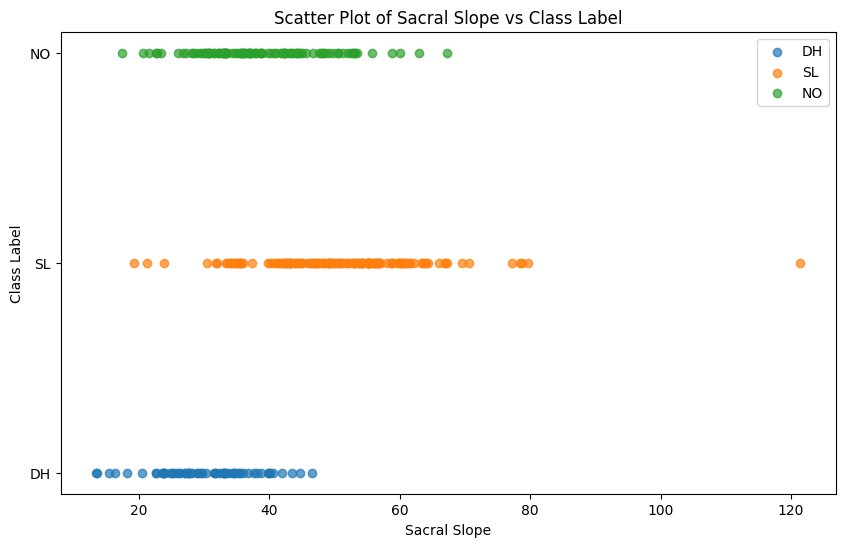

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


columns = ['Pelvic incidence', 'Pelvic tilt', 'Lumbar lordosis angle',
           'Sacral slope', 'Pelvic radius', 'Grade of spondylolisthesis', 'Class']

# Load the dataset
file_path = 'Vertebral_column_3C.dat' 
data = pd.read_csv(file_path, delimiter=r'\s+', header=None)
data.columns = columns

plt.figure(figsize=(10, 6))

# Plotting data points for each class separately
classes = data['Class'].unique()
for cls in classes:
    subset = data[data['Class'] == cls]
    plt.scatter(subset['Sacral slope'], [cls] * len(subset), label=cls, alpha=0.7)

# Adding labels and title
plt.xlabel('Sacral Slope')
plt.ylabel('Class Label')
plt.title('Scatter Plot of Sacral Slope vs Class Label')
plt.legend()

# Display the plot
plt.show()




2 -  Divide the data into a training set and a testing set. Use the training set to train a logistic
regression model with the sckit-learn logistic regression object, and use the trained model to
predict the class labels of the testing data samples. Summarize the prediction results in a
confusion matrix (sklearn.metrics.confusion matrix) and calculate the prediction accuracy.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Encode class labels to numerical values
data['Class'] = data['Class'].astype('category').cat.codes

# Split the data into features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict class labels for the testing data
y_pred = log_reg.predict(X_test)

# Summarize the prediction results in a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the prediction accuracy
accuracy = accuracy_score(y_test, y_pred)


# Display confusion matrix and accuracy
print("Confusion Matrix:\n", conf_matrix)
print("Prediction Accuracy:", accuracy)


Confusion Matrix:
 [[ 8  9  1]
 [ 4 20  0]
 [ 1  0 50]]
Prediction Accuracy: 0.8387096774193549


3 - Repeat Problem 2 with the LDA classifier.

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Train an LDA classifier
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Predict class labels for the testing data using LDA
y_pred_lda = lda.predict(X_test)

# Summarize the prediction results in a confusion matrix
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)

# Calculate the prediction accuracy
accuracy_lda = accuracy_score(y_test, y_pred_lda)

print("\nLDA Confusion Matrix:\n", conf_matrix_lda)
print("LDA Prediction Accuracy:", accuracy_lda)




LDA Confusion Matrix:
 [[ 8  9  1]
 [ 4 18  2]
 [ 0  5 46]]
LDA Prediction Accuracy: 0.7741935483870968
